<a href="https://colab.research.google.com/github/Danicoder/Especializacion_IA_BigData/blob/main/Kmeans_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASO PRÁCTICO KMEANS – DBSCAN (seeds.csv)

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn import metrics
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving seeds.csv to seeds.csv


In [6]:
df = pd.read_csv('seeds.csv')

In [7]:
df.head(5)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


Calculo los perceptiles

In [9]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


Escalamos los datos para evitar diferencia de magnitudes

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_nuevo=ss.fit_transform(df)

Separamos entrada (X) y la de salida (y)

In [11]:
X=df.drop('Type',axis=1)
y=df['Type']

Copiamos el Dataframe

In [14]:
de_copia = X.copy()

importar la biblioteca zscore para tranformar los datos con una media de cero y una desviación estándar de uno

In [17]:
from scipy.stats import zscore

df_escalado = de_copia.apply(zscore)
df_escalado

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962
3,-0.370368,-0.501725,1.061395,-0.721281,0.300679,-0.981475,-1.252656
4,0.419297,0.301550,1.401014,0.033559,0.785615,-1.597530,-0.499825
...,...,...,...,...,...,...,...
194,-0.936866,-1.067843,0.321970,-1.143902,-0.753989,-0.046488,-1.120402
195,-1.266465,-1.312651,-0.847353,-1.137122,-1.246874,0.426457,-0.849790
196,-0.590100,-0.715932,0.751868,-0.920162,-0.088859,3.145549,-0.741952
197,-1.057032,-1.060193,-0.804363,-1.058022,-1.138227,-0.068977,-0.766368


##Aplicamos el algoritmo KMEANS

In [19]:
from sklearn.cluster import KMeans
# 3clusters y un valor random
model = KMeans(n_clusters = 3,random_state=42)
model

KMeans(n_clusters=3, random_state=42)

Entrenamos

In [20]:
clusters=model.fit(X)
clusters

KMeans(n_clusters=3, random_state=42)

Calculamos el número de clusters así como los errores

In [23]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 10 )
    clusters.fit(df_escalado)
    # labels = clusters.labels_
    # centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame( { "Num_Clusters":cluster_range, "Error_Cluster": cluster_errors } )
clusters_df[0:15]


,Num_Clusters,Error_Cluster
0,1,1393.000000
1,2,620.030030
2,3,408.805700
3,4,349.636664
4,5,309.055924
5,6,277.033747
6,7,250.066272
7,8,228.396740
8,9,213.304675
9,10,194.842541


Calculamos con 3 clusters con un número inicial de 15 y otro random de 2345

In [24]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(df_escalado)

KMeans(n_clusters=3, n_init=15, random_state=2345)

Calculmos los centroides

In [25]:
centroides = kmeans.cluster_centers_
centroides

array([[ 1.18592301,  1.19352447,  0.53698128,  1.17682554,  1.09880466,
        -0.055792  ,  1.23189199],
       [-0.26305171, -0.299431  ,  0.39628088, -0.39035247, -0.10570481,
        -0.64680904, -0.71500697],
       [-1.0569178 , -1.02321697, -1.07985616, -0.89793815, -1.14030309,
         0.81877135, -0.582501  ]])

 Los transformamos en un dataframe

In [27]:
centroide_df = pd.DataFrame(centroides, columns = list(df_escalado) )
centroide_df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,1.185923,1.193524,0.536981,1.176826,1.098805,-0.055792,1.231892
1,-0.263052,-0.299431,0.396281,-0.390352,-0.105705,-0.646809,-0.715007
2,-1.056918,-1.023217,-1.079856,-0.897938,-1.140303,0.818771,-0.582501


Mostramos el array de etiquetas

In [28]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2], dtype=int32)

Lo convertimos en un DataFrame

In [29]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

Unimos nuestro df_labels a nuestro dataframe

In [30]:
df_labeled = df.join(df_labels)
df_labeled

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1
...,...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,1
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,2
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,2
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,2


Agrupamos para tener mejor organización de los datos

In [31]:
df_analisis = (df_labeled.groupby(['labels'] , axis=0)).head()
df_analisis

<ipython-input-31-8ad364798ca3>:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_analisis = (df_labeled.groupby(['labels'] , axis=0)).head()
<ipython-input-31-8ad364798ca3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_analisis = (df_labeled.groupby(['labels'] , axis=0)).head()


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1
7,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1,0
8,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1,0
18,12.72,13.57,0.8686,5.226,3.049,4.102,4.914,1,2
35,17.08,15.38,0.9079,5.832,3.683,2.956,5.484,1,0
65,12.73,13.75,0.8458,5.412,2.882,3.533,5.067,1,2


Mostramos el valor de nuestro nuevo campo labels

In [32]:
df_labeled['labels'].value_counts()

,count
labels,
1,70
0,69
2,60


Determinamos el mejor K con un nuevo modelo KMEANS

In [33]:
kmeans2 = KMeans(n_clusters=3)
# Entrenamos y predecimos el dataframe:
clusters = kmeans2.fit_predict(df)
# Añadimos la eteiqueta nueva con el valor de su prediccin:
df_k = df.copy(deep=True)
df_k['label'] = clusters

Visualizamos gráficamente

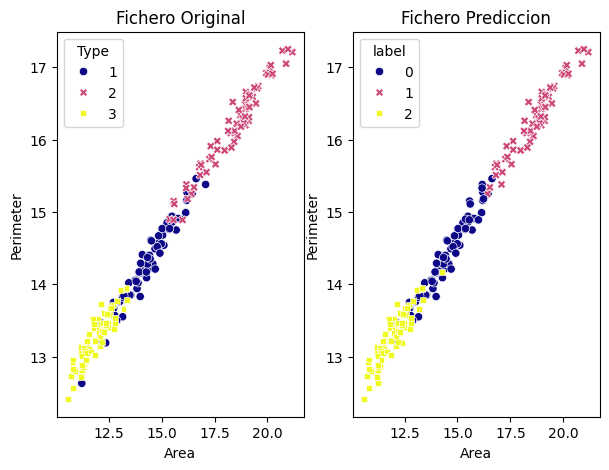

In [34]:
plt.figure(figsize=(7,5))
ax1 = plt.subplot(1,2,1)
plt.title('Fichero Original')
sns.scatterplot(x='Area', y='Perimeter', hue='Type', style='Type',
palette='plasma',data=df, ax=ax1)
ax2 = plt.subplot(1,2,2)
plt.title('Fichero Prediccion')
sns.scatterplot(x='Area', y='Perimeter', hue='label', style='label',
palette='plasma',data=df_k, ax=ax2)
plt.show()

Representamos todos los clusters (1,2,3) con el coeficiente Shilhoute de cada cluster

Automatically created module for IPython interactive environment
Para n_clusters = 2 La media del Calculo silhouetteses : 0.7049787496083262


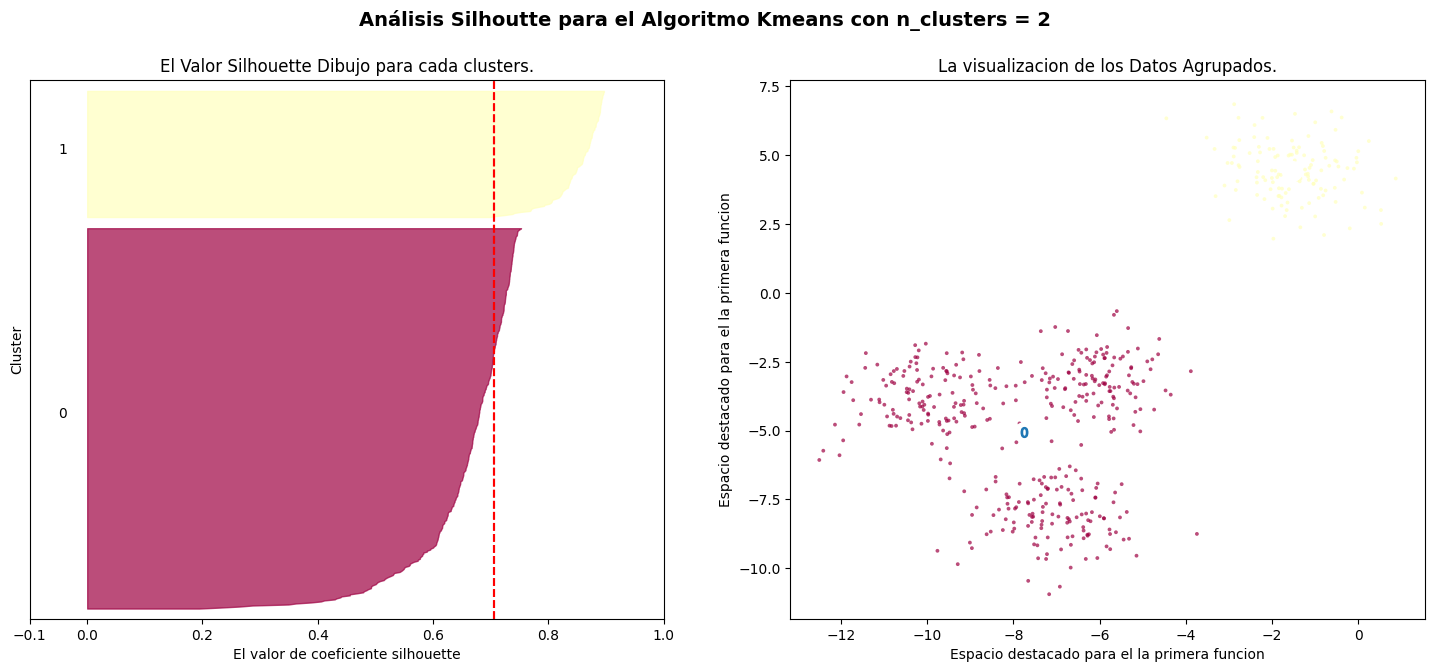

<Figure size 640x480 with 0 Axes>

Para n_clusters = 3 La media del Calculo silhouetteses : 0.5882004012129721


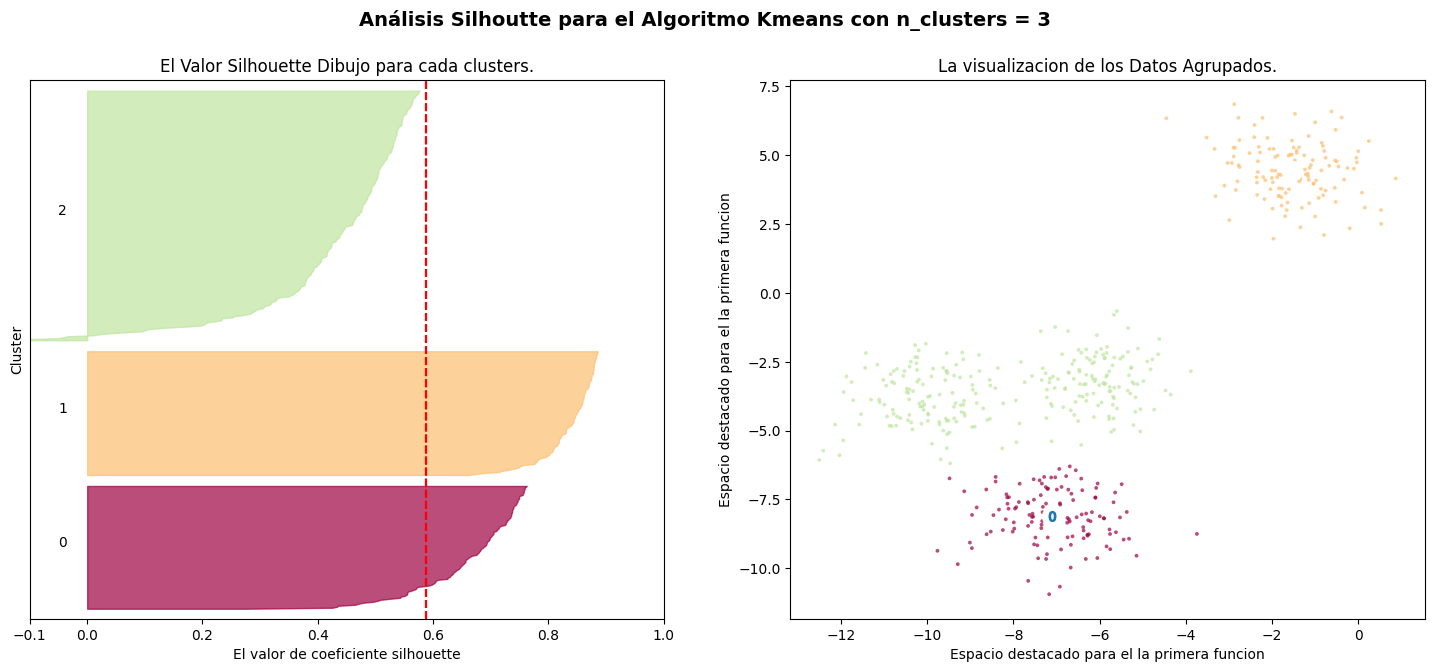

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Para n_clusters = 4 La media del Calculo silhouetteses : 0.6505186632729437


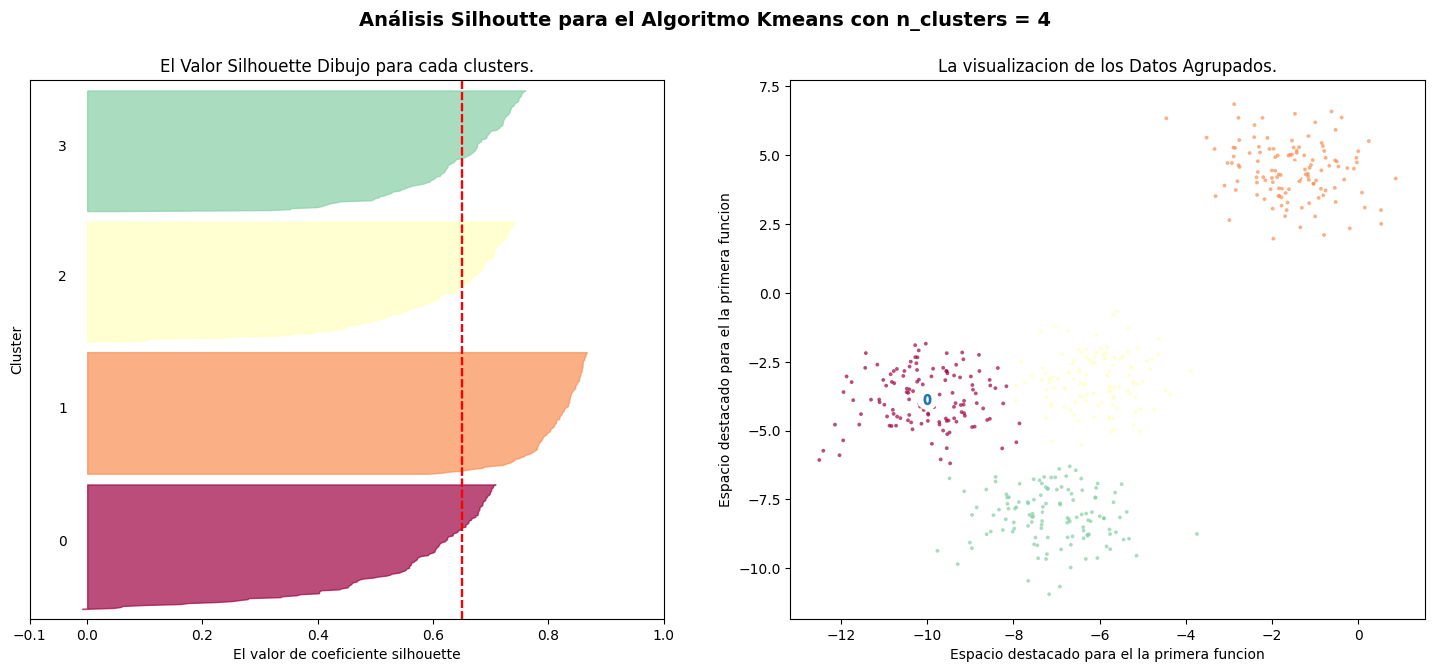

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Para n_clusters = 5 La media del Calculo silhouetteses : 0.561464362648773


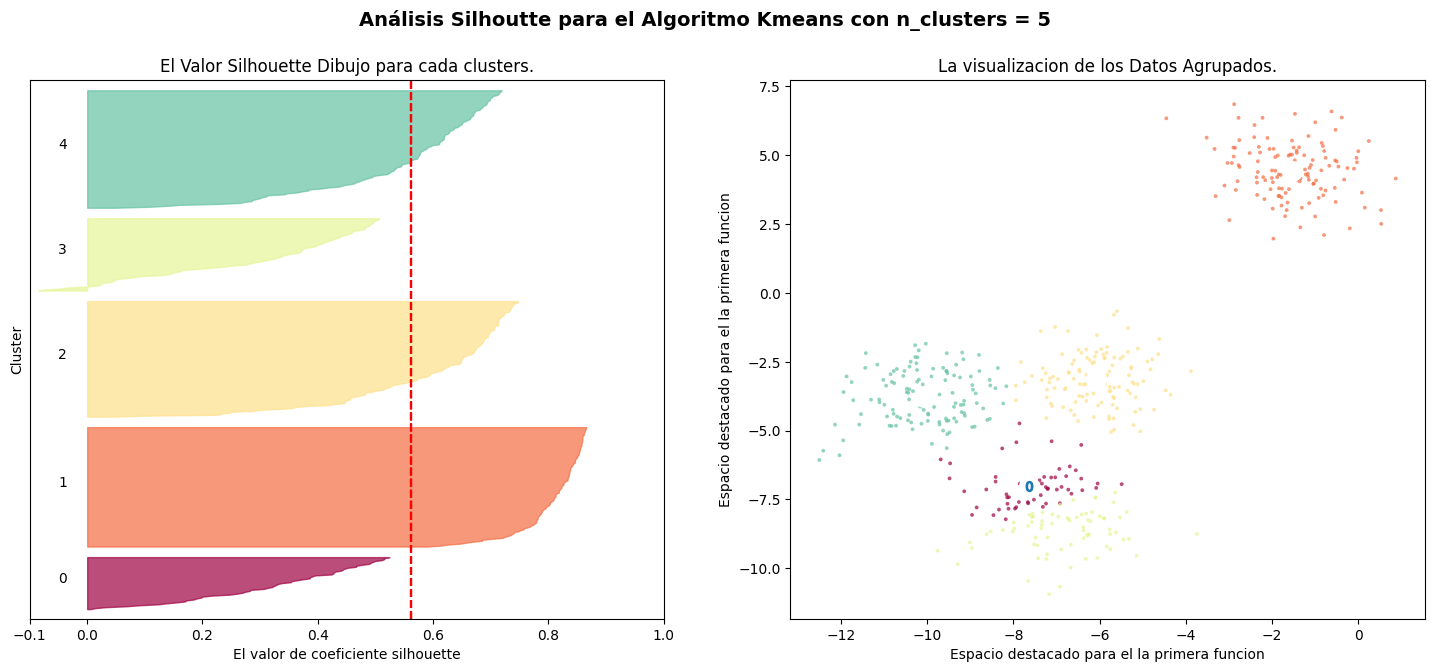

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Para n_clusters = 6 La media del Calculo silhouetteses : 0.4857596147013469


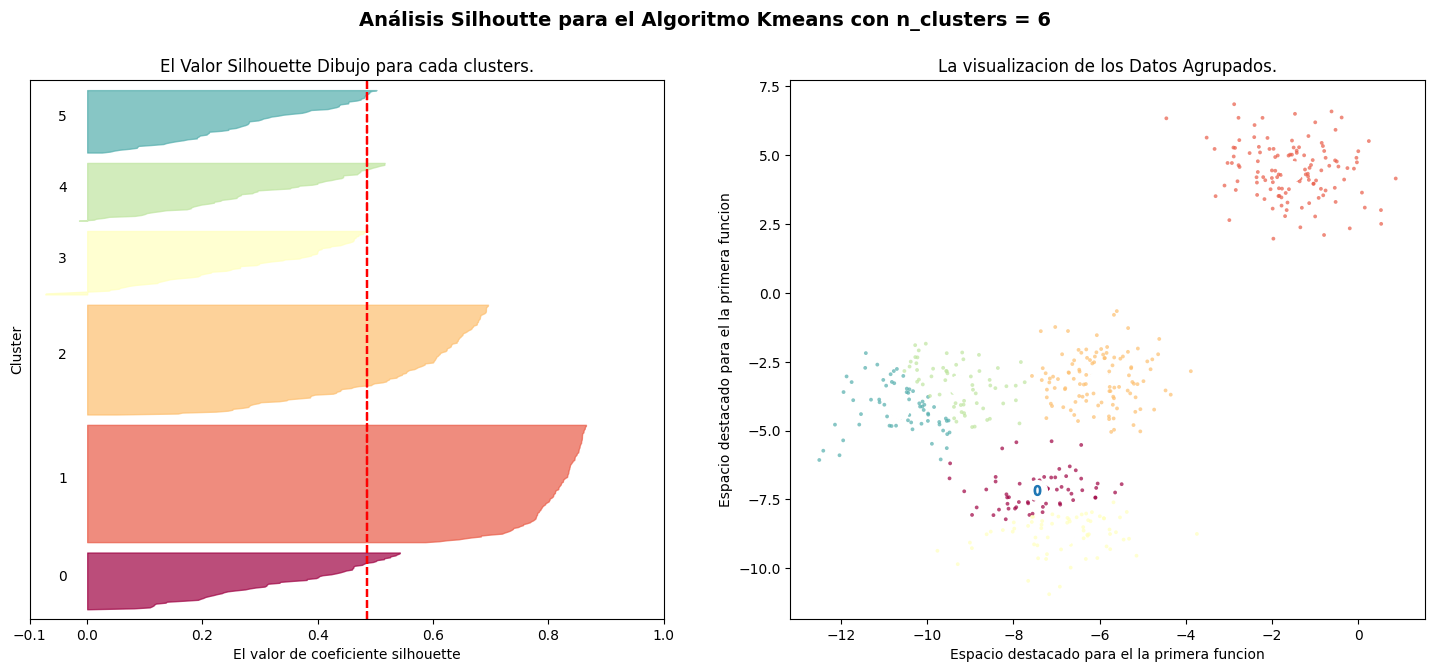

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generamos la muestro con make_blods
# Esta configuración particular tiene un grupo distinto y 3 grupos colocados juntos
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Creamos una subtramna con una fila y dos columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # La primera subtrama la usaremos para el coeficicente de Silhoutte
    # TRecuerde que el coeficiente Silhoutte puede variar entre -1 y 1
    # pero en este caso va a oscilar entre [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

    # Añadimos espacios en blanco
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicialice el clusterer con el valor n_clusters y un generador aleatorio
    # con una semilla de 10 para reproducibilidad.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Silhouette_score proporciona el valor promedio de todas las muestras.
    # Esto da una perspectiva de la densidad y separación de lo formado por los clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "La media del Calculo silhouetteses :", silhouette_avg)

    # Calculamos el Coeficiente silhouette para cada ejemplo
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregue las puntuaciones de silueta para las muestras que pertenecen al cluster i
        # cluster i, y ordenarlos
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calculmos el nuevo y_lower para cada punto
        y_lower = y_upper + 10  # 10 por el 0 ejemplos
        ax1.set_title("El Valor Silhouette Dibujo para cada clusters.")
        ax1.set_xlabel("El valor de coeficiente silhouette")
        ax1.set_ylabel("Cluster")

        # La línea vertical para la puntuación de silueta promedio de todos los valores.

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot mostradon el actual clusters
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors)

    # Etiquetamos los clusters
    centers = clusterer.cluster_centers_

    # Dibujamos con circulos y el cientro del cluster
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("La visualizacion de los Datos Agrupados.")
        ax2.set_xlabel("Espacio destacado para el la primera funcion")
        ax2.set_ylabel("Espacio destacado para el la primera funcion")
        plt.suptitle(("Análisis Silhoutte para el Algoritmo Kmeans "
        "con n_clusters = %d" % n_clusters),
        fontsize=14, fontweight='bold')
        plt.show()

 Aplicamos el algoritmo DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

model=DBSCAN(eps=0.8,min_samples=6).fit(df_escalado)
labels=model.labels_
labels

array([ 0,  0, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1,
       -1,  1,  0,  0, -1, -1,  0, -1,  1,  1,  0,  1, -1,  0, -1,  0,  0,
       -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1,  0,  0, -1,  0, -1, -1, -1,  1, -1, -1,  0,  0,  1,  2,  2,
        2,  3,  2,  2,  2, -1, -1, -1, -1, -1, -1,  3,  3,  3,  3, -1, -1,
       -1, -1,  3,  3, -1, -1,  2,  3, -1, -1,  3, -1,  3,  3,  3,  3,  3,
        2, -1,  3,  3,  3,  3, -1, -1,  3, -1,  3,  3,  3, -1,  2, -1,  3,
       -1,  3,  2,  3, -1, -1,  3,  3, -1,  2, -1,  2, -1, -1,  2,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1])

Visualizamos  los resultados con sus centroides mas grandes

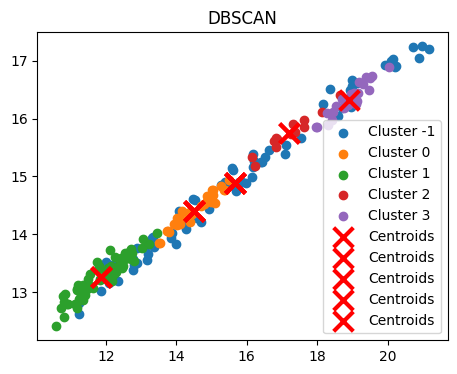

In [40]:
plt.figure(figsize=(18, 4))
# DBSCAN
plt.subplot(1, 3, 1)

for label in np.unique(labels):
    plt.scatter(df[labels == label].iloc[:, 0], df[labels == label].iloc[:, 1], label=f'Cluster {label}')
    plt.title('DBSCAN')
    # Calculamos el Centro del para DBSCAN
    dbscan_centers = pd.DataFrame(index=np.unique(labels),
    columns=df_escalado.columns)

for label in np.unique(labels):
    dbscan_centers.loc[label] = df[labels == label].mean()
    #Dibujamos los centroides
    plt.scatter(dbscan_centers.iloc[:, 0], dbscan_centers.iloc[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
    plt.legend()

 Calculamos el coeficiente de Silhotte

In [41]:
from sklearn.metrics import silhouette_score

# Silhouette Score for DBSCAN
silhouette_dbscan = silhouette_score(df_escalado, labels)
print('El valor del Coeficiente Silhouette es:',silhouette_dbscan)

El valor del Coeficiente Silhouette es: 0.13254513188788175


Calculamos el índice de Calinski Harabasz

In [42]:
from sklearn import metrics

print('Indice de Calinski harabasz: ', metrics.calinski_harabasz_score(df_escalado,
labels))

Indice de Calinski harabasz:  53.72853261570971
